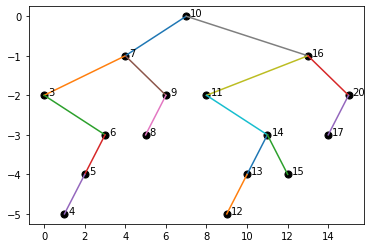

In [109]:
import numpy as np
import matplotlib.pyplot as plt

class TreeNode(object):
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.inorder_pos = 0
    
    def inorder(self, num, key_list):
        """
        Parameters
        ----------
        num: list
            List of a single element which keeps 
            track of the number I'm at
        """
        if self.left:
            self.left.inorder(num, key_list)
        self.inorder_pos = num[0]
        key_list.append(self.key)
        num[0] += 1
        if self.right:
            self.right.inorder(num, key_list)
    
    def draw(self, y):
        x = self.inorder_pos
        plt.scatter([x], [y], 50, 'k')
        plt.text(x+0.2, y, "{}".format(self.key))
        y_next = y-1
        if self.left:
            x_next = self.left.inorder_pos
            plt.plot([x, x_next], [y, y_next])
            self.left.draw(y_next)
        if self.right:
            x_next = self.right.inorder_pos
            plt.plot([x, x_next], [y, y_next])
            self.right.draw(y_next)
            
    def add(self, key):
        if key < self.key:
            if self.left:
                self.left.add(key)
            else:
                self.left = TreeNode(key)
        elif key > self.key:
            if self.right:
                self.right.add(key)
            else:
                self.right = TreeNode(key)

    def remove_naive(self, key, key_list):
        if key < self.key:
            if self.left:
                self.left = self.left.remove_naive(key, key_list)
        elif key > self.key:
            if self.right:
                self.right = self.right.remove_naive(key, key_list)
        else:
            self.inorder([0], key_list)
            return None
            
            #return self
        return self
        
class BinaryTree(object):
    def __init__(self):
        self.root = None
    
    def inorder(self):
        key_list = []
        if self.root:
            self.root.inorder([0], key_list)
        return key_list
    
    def draw(self):
        self.inorder()
        if self.root:
            self.root.draw(0)
    
    def add(self, key):
        if self.root:
            self.root.add(key)
        else:
            self.root = TreeNode(key)
    
    def remove_naive(self, key):
        key_list = []
        if self.root:
            self.root = self.root.remove_naive(key, key_list)
            if key_list:
                np.random.shuffle(key_list)
                for keys in key_list:
                    if keys != key:
                        self.add(keys)
                
            
        

def make_tree():
    T = BinaryTree()
    for val in [10, 7, 16, 3, 9, 11, 20, 14, 17, 13, 12, 6, 5, 17, 15, 4, 8]:
        T.add(val)
    return T

T = make_tree()
T.draw()

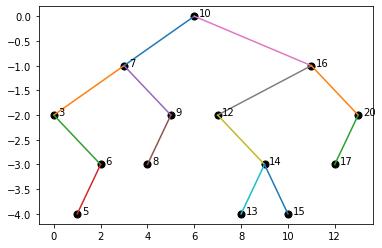

In [110]:
#T.remove_naive(11)
T.remove_naive(4)
T.remove_naive(11)
T.draw()